<div class="alert alert-warning">

### **If you did not discuss this project with any person other than the instructors, sign below:**
    
### "*I have not discussed this project with anyone other than the instructors.*"

### Sign your full name here: Yeshwanth Bharadwaj Mellachervu

</div>

<div class="alert alert-warning">
    
### Please sign your pledge that “*I have not received or given any unauthorized aid on this project.*”
    
### **Sign your full name here**: Yeshwanth Bharadwaj Mellachervu

</div>

### Importing packages

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer
from datetime import datetime
import math
plt.rcParams['figure.figsize'] = [15, 5]  # set default figure size 

### Reading the data into pandas dataframe


In [2]:
bitcoin = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# 1.Handling missing values 




### 1.Sklearn- SimpleImputer



### There are many missing values in the given dataframe, the values are represented as NaN in the dataframe. To handle that SimpleImputer is used from sklearn 

In [3]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

imputer = imputer.fit(bitcoin)

bitcoin_UCD = imputer.transform(bitcoin)
bitcoin_UCD

array([[1.32531792e+09, 4.39000000e+00, 4.39000000e+00, ...,
        4.55580870e-01, 2.00000002e+00, 4.39000000e+00],
       [1.32531798e+09, 3.59697000e+03, 3.59819000e+03, ...,
        1.97981073e+00, 3.81012414e+03, 3.59680414e+03],
       [1.32531804e+09, 3.59697000e+03, 3.59819000e+03, ...,
        1.97981073e+00, 3.81012414e+03, 3.59680414e+03],
       ...,
       [1.61714868e+09, 5.86934300e+04, 5.87238400e+04, ...,
        1.70568236e+00, 1.00117070e+05, 5.86961985e+04],
       [1.61714874e+09, 5.87421800e+04, 5.87703800e+04, ...,
        7.20415490e-01, 4.23329586e+04, 5.87618662e+04],
       [1.61714880e+09, 5.87677500e+04, 5.87781800e+04, ...,
        2.71283104e+00, 1.59417751e+05, 5.87643494e+04]])

In [4]:
bitcoin_data = pd.DataFrame(bitcoin_UCD)
bitcoin_data

,0,1,2,3,4,5,6,7
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
3,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
4,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
...,...,...,...,...,...,...,...,...
4857372,1.617149e+09,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1.617149e+09,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1.617149e+09,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1.617149e+09,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
# Renaming the columns in the dataframe
bitcoin_data.rename(columns= {0:'Timestamp',1:'Open',2:'High',3:'Low',
                              4:'Close',5:'Volume_(BTC)',6:'Volume_(Currency)',
                              7:'Weighted_Price'}, inplace=True)

bitcoin_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
3,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
4,1.325318e+09,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
...,...,...,...,...,...,...,...,...
4857372,1.617149e+09,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1.617149e+09,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1.617149e+09,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1.617149e+09,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [6]:
bitcoin_timestamp = bitcoin_data["Timestamp"].astype('int')
bitcoin_data["Timestamp"]=bitcoin_timestamp
bitcoin_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
2,1325318040,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
3,1325318100,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
4,1325318160,3596.97,3598.19,3595.62,3597.00,1.979811,3810.124143,3596.804145
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


## The Missing values-NaN values in dataframe have been cleaned and we used median as aggregate function to estimate missing values, but in general we dont use Mean,Median for estimating missing values for time series data rather we use interpolation





### 2. Linear interpolation in forward direction has been done for filling the missing values

In [7]:
bitcoin_interpolated = bitcoin.interpolate(method="linear",limit_direction='forward')
bitcoin_interpolated.head(50)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.952907,4.183264,4.39
6,1325318280,4.39,4.39,4.39,4.39,1.052373,4.619916,4.39
7,1325318340,4.39,4.39,4.39,4.39,1.151838,5.056569,4.39
8,1325318400,4.39,4.39,4.39,4.39,1.251303,5.493222,4.39
9,1325318460,4.39,4.39,4.39,4.39,1.350769,5.929874,4.39


In [8]:
bitcoin_interpolated.value_counts()

Timestamp   Open          High          Low       Close     Volume_(BTC)  Volume_(Currency)  Weighted_Price
1325317920  4.390000      4.390000      4.39      4.39      0.455581      2.000000           4.390000          1
1520001660  10835.990000  10853.240000  10835.00  10853.22  10.592257     114917.903210      10849.236510      1
1520001540  10832.990000  10842.220000  10821.71  10842.22  1.142541      12383.069664       10838.188147      1
1520001480  10825.100000  10833.980000  10825.10  10827.00  3.216331      34827.108182       10828.209338      1
1520001420  10829.990000  10830.990000  10819.99  10830.99  1.469128      15908.397284       10828.462310      1
                                                                                                              ..
1422853800  228.210909    228.219091    228.15    228.15    11.812692     2694.463546        228.176930        1
1422853740  228.256364    228.263636    228.19    228.19    10.698538     2440.423514        228.2228

#### Converting the Timestamp to Datetime format -  Interpolated data

In [9]:
bitcoin_interpolated_ts = bitcoin_interpolated["Timestamp"]
bitcoin_interpolated_ts

0          1325317920
1          1325317980
2          1325318040
3          1325318100
4          1325318160
              ...    
4857372    1617148560
4857373    1617148620
4857374    1617148680
4857375    1617148740
4857376    1617148800
Name: Timestamp, Length: 4857377, dtype: int64

In [10]:
bitcoin_ip_datetime = []

for i in range(len(bitcoin_interpolated_ts)):
    temp = datetime.fromtimestamp(bitcoin_interpolated_ts[i]).strftime('%m-%d-%Y %H:%M:%S')
    bitcoin_ip_datetime.append(temp)



bitcoin_ip_datetime

['12-31-2011 02:52:00',
 '12-31-2011 02:53:00',
 '12-31-2011 02:54:00',
 '12-31-2011 02:55:00',
 '12-31-2011 02:56:00',
 '12-31-2011 02:57:00',
 '12-31-2011 02:58:00',
 '12-31-2011 02:59:00',
 '12-31-2011 03:00:00',
 '12-31-2011 03:01:00',
 '12-31-2011 03:02:00',
 '12-31-2011 03:03:00',
 '12-31-2011 03:04:00',
 '12-31-2011 03:05:00',
 '12-31-2011 03:06:00',
 '12-31-2011 03:07:00',
 '12-31-2011 03:08:00',
 '12-31-2011 03:09:00',
 '12-31-2011 03:10:00',
 '12-31-2011 03:11:00',
 '12-31-2011 03:12:00',
 '12-31-2011 03:13:00',
 '12-31-2011 03:14:00',
 '12-31-2011 03:15:00',
 '12-31-2011 03:16:00',
 '12-31-2011 03:17:00',
 '12-31-2011 03:18:00',
 '12-31-2011 03:19:00',
 '12-31-2011 03:20:00',
 '12-31-2011 03:21:00',
 '12-31-2011 03:22:00',
 '12-31-2011 03:23:00',
 '12-31-2011 03:24:00',
 '12-31-2011 03:25:00',
 '12-31-2011 03:26:00',
 '12-31-2011 03:27:00',
 '12-31-2011 03:28:00',
 '12-31-2011 03:29:00',
 '12-31-2011 03:30:00',
 '12-31-2011 03:31:00',
 '12-31-2011 03:32:00',
 '12-31-2011 03:

In [11]:
bitcoin_ip_time = []
for i in range(len(bitcoin_interpolated_ts)):
    temp = datetime.fromtimestamp(bitcoin_interpolated_ts[i]).strftime('%m-%d-%Y')
    bitcoin_ip_time.append(temp)



bitcoin_ip_time

['12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-20

In [12]:
bitcoin_interpolated["Datetime"]=bitcoin_ip_datetime
bitcoin_interpolated["Date"]=bitcoin_ip_time

In [13]:
bitcoin_interpolated.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39,12-31-2011 02:52:00,12-31-2011
1,1325317980,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39,12-31-2011 02:53:00,12-31-2011
2,1325318040,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39,12-31-2011 02:54:00,12-31-2011
3,1325318100,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39,12-31-2011 02:55:00,12-31-2011
4,1325318160,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39,12-31-2011 02:56:00,12-31-2011


In [14]:
bitcoin_stl= bitcoin_interpolated[["Open","High","Low","Close","Volume_(BTC)","Volume_(Currency)","Weighted_Price","Date"]]

#### Converting the dataframe to Datetime Index- Interpolated

In [15]:
bitcoin_interpolated["Date_time"] = pd.to_datetime(bitcoin_interpolated["Datetime"],format='%m-%d-%Y %H:%M:%S', errors='coerce')
bitcoin_interpolated

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date,Date_time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011,2011-12-31 02:52:00
1,1325317980,4.39,4.39,4.39,4.39,0.555046,2.436653,4.390000,12-31-2011 02:53:00,12-31-2011,2011-12-31 02:53:00
2,1325318040,4.39,4.39,4.39,4.39,0.654511,2.873305,4.390000,12-31-2011 02:54:00,12-31-2011,2011-12-31 02:54:00
3,1325318100,4.39,4.39,4.39,4.39,0.753977,3.309958,4.390000,12-31-2011 02:55:00,12-31-2011,2011-12-31 02:55:00
4,1325318160,4.39,4.39,4.39,4.39,0.853442,3.746611,4.390000,12-31-2011 02:56:00,12-31-2011,2011-12-31 02:56:00
...,...,...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,03-30-2021 19:56:00,03-30-2021,2021-03-30 19:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,03-30-2021 19:57:00,03-30-2021,2021-03-30 19:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,03-30-2021 19:58:00,03-30-2021,2021-03-30 19:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,03-30-2021 19:59:00,03-30-2021,2021-03-30 19:59:00


In [16]:
bitcoin_interpolated.set_index('Date_time',inplace=True)

In [17]:
bitcoin_interpolated

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date
Date_time,,,,,,,,,,
2011-12-31 02:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011
2011-12-31 02:53:00,1325317980,4.39,4.39,4.39,4.39,0.555046,2.436653,4.390000,12-31-2011 02:53:00,12-31-2011
2011-12-31 02:54:00,1325318040,4.39,4.39,4.39,4.39,0.654511,2.873305,4.390000,12-31-2011 02:54:00,12-31-2011
2011-12-31 02:55:00,1325318100,4.39,4.39,4.39,4.39,0.753977,3.309958,4.390000,12-31-2011 02:55:00,12-31-2011
2011-12-31 02:56:00,1325318160,4.39,4.39,4.39,4.39,0.853442,3.746611,4.390000,12-31-2011 02:56:00,12-31-2011
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 19:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,03-30-2021 19:56:00,03-30-2021
2021-03-30 19:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,03-30-2021 19:57:00,03-30-2021
2021-03-30 19:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,03-30-2021 19:58:00,03-30-2021


In [18]:
bitcoin_interpolated.index

DatetimeIndex(['2011-12-31 02:52:00', '2011-12-31 02:53:00',
               '2011-12-31 02:54:00', '2011-12-31 02:55:00',
               '2011-12-31 02:56:00', '2011-12-31 02:57:00',
               '2011-12-31 02:58:00', '2011-12-31 02:59:00',
               '2011-12-31 03:00:00', '2011-12-31 03:01:00',
               ...
               '2021-03-30 19:51:00', '2021-03-30 19:52:00',
               '2021-03-30 19:53:00', '2021-03-30 19:54:00',
               '2021-03-30 19:55:00', '2021-03-30 19:56:00',
               '2021-03-30 19:57:00', '2021-03-30 19:58:00',
               '2021-03-30 19:59:00', '2021-03-30 20:00:00'],
              dtype='datetime64[ns]', name='Date_time', length=4857377, freq=None)

In [19]:
bitcoin_interpolated["2013"].count()

/var/folders/65/yr75mknn4bl2qqpk6y4n_hbw0000gn/T/ipykernel_22228/2392837360.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin_interpolated["2013"].count()


Timestamp            525600
Open                 525600
High                 525600
Low                  525600
Close                525600
Volume_(BTC)         525600
Volume_(Currency)    525600
Weighted_Price       525600
Datetime             525600
Date                 525600
dtype: int64

In [20]:
bitcoin_value = bitcoin_interpolated.resample('M').count()["Weighted_Price"]
print(bitcoin_value)

Date_time
2011-12-31     1268
2012-01-31    44640
2012-02-29    41760
2012-03-31    44580
2012-04-30    43200
              ...  
2020-11-30    43260
2020-12-31    44640
2021-01-31    44640
2021-02-28    40320
2021-03-31    42901
Freq: M, Name: Weighted_Price, Length: 112, dtype: int64


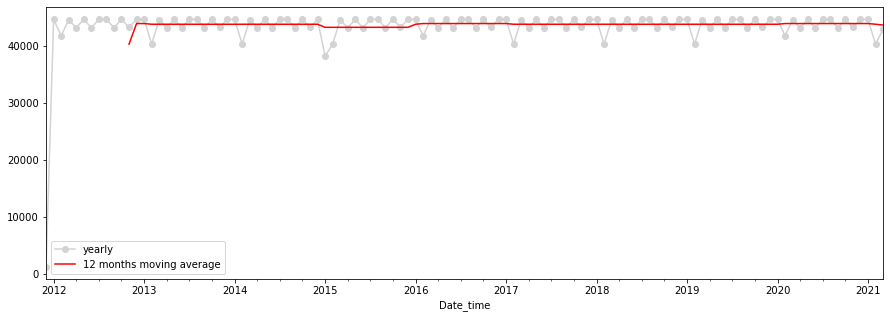

In [21]:
plt.figure(figsize=(15,5))

bitcoin_value.plot(marker='o', color='lightgray',label='yearly')

bitcoin_value.rolling(12).mean().plot(color='red',label='12 months moving average')

plt.legend()

### Interpolating using Linear method give us no sense in data

### 3. Dropping the missing values 

In [22]:
bitcoin_dna = bitcoin.dropna(subset={'Timestamp','Open','High','Low','Close','Volume_(BTC)',
                                     'Volume_(Currency)','Weighted_Price'},inplace=False)

In [23]:
bitcoin_dna

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [24]:
bitcoin_f = bitcoin_dna.reset_index(drop=True)

In [25]:
bitcoin_f.value_counts()

Timestamp   Open      High      Low       Close     Volume_(BTC)  Volume_(Currency)  Weighted_Price
1325317920  4.39      4.39      4.39      4.39      0.455581      2.000000           4.390000          1
1543202040  3965.90   3965.90   3962.14   3962.14   2.579070      10227.229860       3965.471396       1
1543201380  3981.24   3982.42   3976.72   3979.09   29.374063     116905.141210      3979.876474       1
1543201440  3973.54   3973.99   3969.17   3973.99   1.077988      4283.569190        3973.671086       1
1543201500  3972.29   3981.24   3969.82   3981.24   16.192747     64373.295187       3975.440063       1
                                                                                                      ..
1458612900  411.52    411.82    411.13    411.82    48.096393     19780.111389       411.259768        1
1458612960  411.82    411.82    411.82    411.82    0.350908      144.510801         411.820000        1
1458613020  411.82    411.95    411.82    411.95    12.01732

#### Converting the Timestamp to Datetime format -  Nan values dropped

In [26]:
bitcoin_dna_ts = bitcoin_f["Timestamp"]
bitcoin_dna_ts

0          1325317920
1          1325346600
2          1325350740
3          1325350800
4          1325391360
              ...    
3613764    1617148560
3613765    1617148620
3613766    1617148680
3613767    1617148740
3613768    1617148800
Name: Timestamp, Length: 3613769, dtype: int64

In [27]:
bitcoin_dna_ip_datetime = []

for i in range(len(bitcoin_dna_ts)):
    temp = datetime.fromtimestamp(bitcoin_dna_ts[i]).strftime('%m-%d-%Y %H:%M:%S')
    bitcoin_dna_ip_datetime.append(temp)



bitcoin_dna_ip_datetime

['12-31-2011 02:52:00',
 '12-31-2011 10:50:00',
 '12-31-2011 11:59:00',
 '12-31-2011 12:00:00',
 '12-31-2011 23:16:00',
 '01-01-2012 10:28:00',
 '01-01-2012 17:45:00',
 '01-02-2012 15:04:00',
 '01-03-2012 06:45:00',
 '01-03-2012 09:22:00',
 '01-03-2012 09:54:00',
 '01-03-2012 10:32:00',
 '01-03-2012 12:10:00',
 '01-03-2012 12:14:00',
 '01-03-2012 12:26:00',
 '01-03-2012 12:27:00',
 '01-03-2012 23:17:00',
 '01-04-2012 00:05:00',
 '01-04-2012 07:41:00',
 '01-04-2012 07:57:00',
 '01-04-2012 10:39:00',
 '01-04-2012 10:53:00',
 '01-04-2012 10:54:00',
 '01-04-2012 11:00:00',
 '01-04-2012 12:51:00',
 '01-04-2012 20:40:00',
 '01-04-2012 22:52:00',
 '01-05-2012 02:19:00',
 '01-05-2012 03:58:00',
 '01-05-2012 04:03:00',
 '01-05-2012 04:48:00',
 '01-05-2012 05:08:00',
 '01-05-2012 05:10:00',
 '01-05-2012 05:48:00',
 '01-05-2012 06:20:00',
 '01-05-2012 06:21:00',
 '01-05-2012 06:28:00',
 '01-05-2012 08:07:00',
 '01-05-2012 08:38:00',
 '01-05-2012 09:31:00',
 '01-05-2012 17:50:00',
 '01-05-2012 18:

In [28]:
bitcoin_dna_ip_time = []
for i in range(len(bitcoin_dna_ts)):
    temp = datetime.fromtimestamp(bitcoin_dna_ts[i]).strftime('%m-%d-%Y')
    bitcoin_dna_ip_time.append(temp)



bitcoin_dna_ip_time

['12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '12-31-2011',
 '01-01-2012',
 '01-01-2012',
 '01-02-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-03-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-04-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-05-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-06-2012',
 '01-07-2012',
 '01-08-2012',
 '01-08-2012',
 '01-08-2012',
 '01-09-2012',
 '01-09-2012',
 '01-09-20

In [29]:
bitcoin_f["Datetime"]=bitcoin_dna_ip_datetime
bitcoin_f["Date"]=bitcoin_dna_ip_time

In [30]:
bitcoin_f.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,12-31-2011 10:50:00,12-31-2011
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,12-31-2011 11:59:00,12-31-2011
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,12-31-2011 12:00:00,12-31-2011
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,12-31-2011 23:16:00,12-31-2011


#### Converting the dataframe to Datetime Index- NaN Values dropped

In [31]:
bitcoin_f["Date_time"] = pd.to_datetime(bitcoin_f["Datetime"],format='%m-%d-%Y %H:%M:%S', errors='coerce')
bitcoin_f

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date,Date_time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011,2011-12-31 02:52:00
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,12-31-2011 10:50:00,12-31-2011,2011-12-31 10:50:00
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,12-31-2011 11:59:00,12-31-2011,2011-12-31 11:59:00
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,12-31-2011 12:00:00,12-31-2011,2011-12-31 12:00:00
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,12-31-2011 23:16:00,12-31-2011,2011-12-31 23:16:00
...,...,...,...,...,...,...,...,...,...,...,...
3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,03-30-2021 19:56:00,03-30-2021,2021-03-30 19:56:00
3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,03-30-2021 19:57:00,03-30-2021,2021-03-30 19:57:00
3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,03-30-2021 19:58:00,03-30-2021,2021-03-30 19:58:00
3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,03-30-2021 19:59:00,03-30-2021,2021-03-30 19:59:00


In [32]:
bitcoin_f.set_index('Date_time',inplace=True)

In [33]:
bitcoin_f

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date
Date_time,,,,,,,,,,
2011-12-31 02:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011
2011-12-31 10:50:00,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,12-31-2011 10:50:00,12-31-2011
2011-12-31 11:59:00,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,12-31-2011 11:59:00,12-31-2011
2011-12-31 12:00:00,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,12-31-2011 12:00:00,12-31-2011
2011-12-31 23:16:00,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,12-31-2011 23:16:00,12-31-2011
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 19:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,03-30-2021 19:56:00,03-30-2021
2021-03-30 19:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,03-30-2021 19:57:00,03-30-2021
2021-03-30 19:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,03-30-2021 19:58:00,03-30-2021


In [34]:
bitcoin_f.index

DatetimeIndex(['2011-12-31 02:52:00', '2011-12-31 10:50:00',
               '2011-12-31 11:59:00', '2011-12-31 12:00:00',
               '2011-12-31 23:16:00', '2012-01-01 10:28:00',
               '2012-01-01 17:45:00', '2012-01-02 15:04:00',
               '2012-01-03 06:45:00', '2012-01-03 09:22:00',
               ...
               '2021-03-30 19:50:00', '2021-03-30 19:51:00',
               '2021-03-30 19:53:00', '2021-03-30 19:54:00',
               '2021-03-30 19:55:00', '2021-03-30 19:56:00',
               '2021-03-30 19:57:00', '2021-03-30 19:58:00',
               '2021-03-30 19:59:00', '2021-03-30 20:00:00'],
              dtype='datetime64[ns]', name='Date_time', length=3613769, freq=None)

# 2. Visualizations of the DataFrame

### 1. Line Plot of High value sold on different days

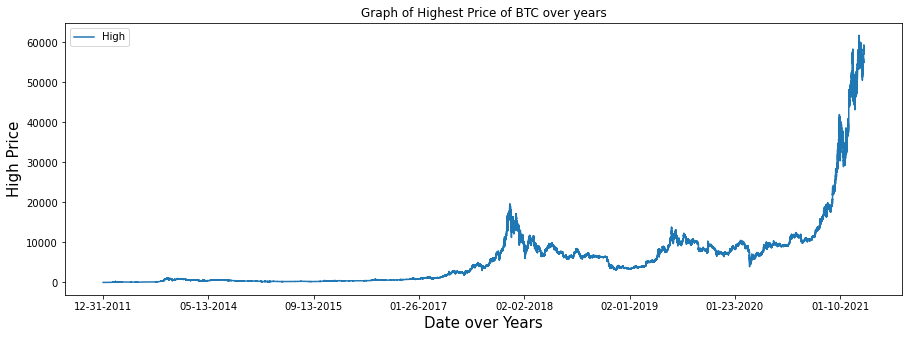

In [35]:
bitcoin_f.plot.line(x="Date",y="High")

plt.title("Graph of Highest Price of BTC over years")
plt.xlabel("Date over Years",fontsize=15)
plt.ylabel("High Price",fontsize=15)
plt.show()

### 2. Bitcoin Open Value over years

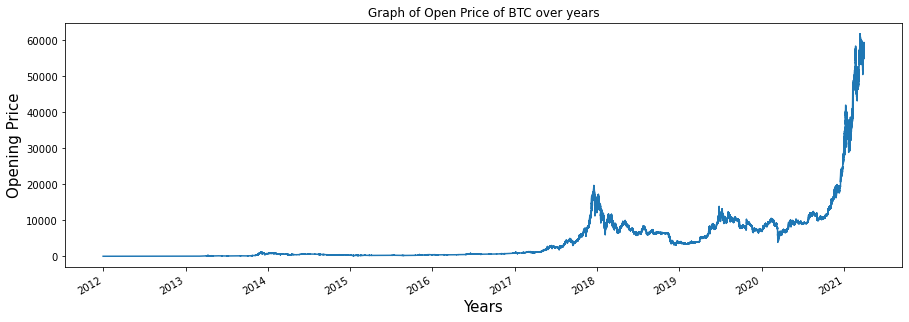

In [36]:
bitcoin_f["Open"].plot()

plt.title("Graph of Open Price of BTC over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Opening Price",fontsize=15)
plt.show()

### 3. Bitcoin Close Value over years

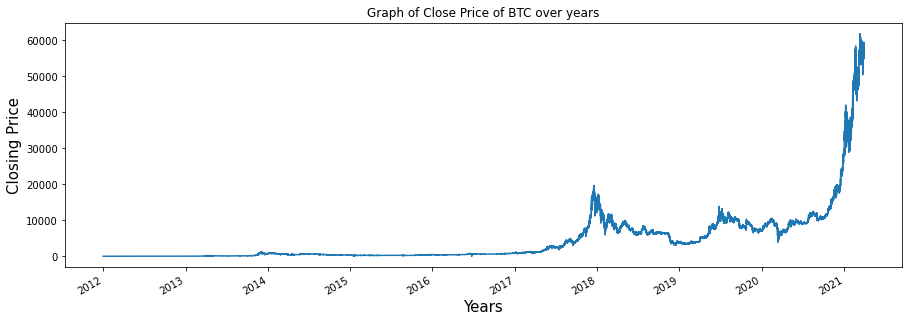

In [37]:
bitcoin_f["Close"].plot()

plt.title("Graph of Close Price of BTC over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Closing Price",fontsize=15)
plt.show()

#### A closer look at trend from 12-01-2020 to 01-10-2021

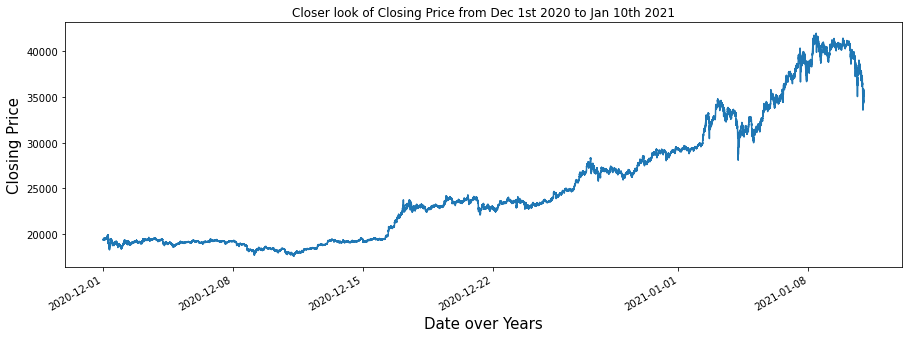

In [38]:
bitcoin_f["12-01-2020":"01-10-2021"]["Close"].plot()

plt.title("Closer look of Closing Price from Dec 1st 2020 to Jan 10th 2021")
plt.xlabel("Date over Years",fontsize=15)
plt.ylabel("Closing Price",fontsize=15)
plt.show()

### 4. Bitcoin High Value over years

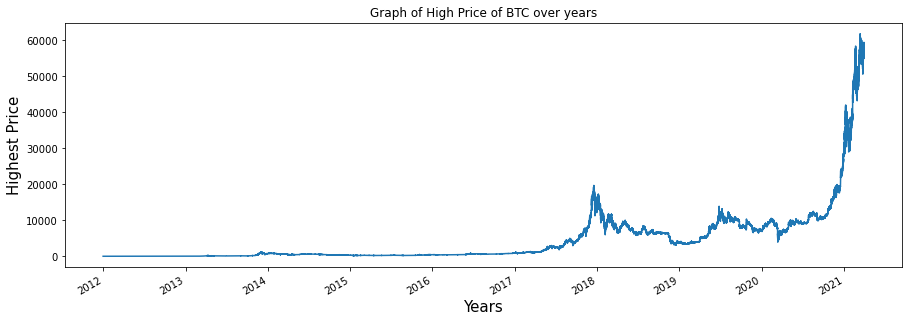

In [39]:
bitcoin_f["High"].plot()

plt.title("Graph of High Price of BTC over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Highest Price",fontsize=15)
plt.show()

### 5. Bitcoin Low Value over years

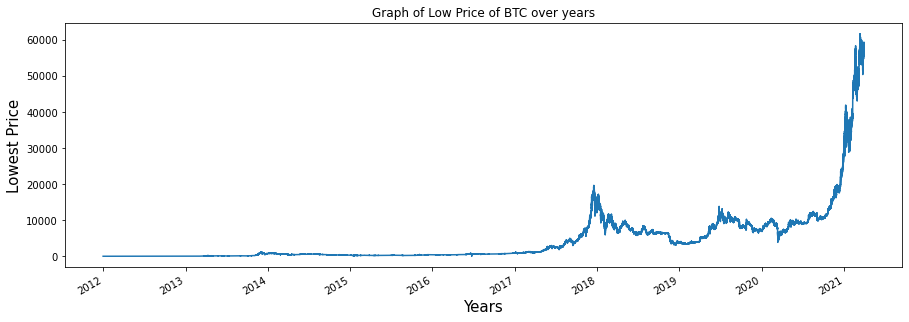

In [40]:
bitcoin_f["Low"].plot()

plt.title("Graph of Low Price of BTC over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Lowest Price",fontsize=15)
plt.show()

### 6. Bitcoin Volume_(BTC) Value over years

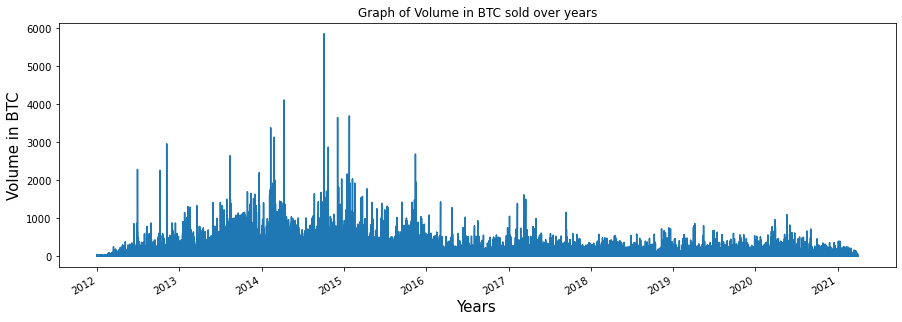

In [41]:
bitcoin_f["Volume_(BTC)"].plot()

plt.title("Graph of Volume in BTC sold over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Volume in BTC",fontsize=15)
plt.show()

### 7. Bitcoin Volume_(Currency) Value over years

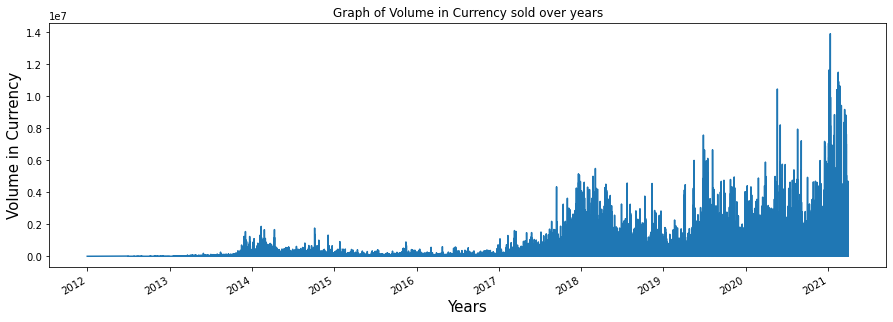

In [42]:
bitcoin_f["Volume_(Currency)"].plot()

plt.title("Graph of Volume in Currency sold over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Volume in Currency",fontsize=15)
plt.show()

#### A closer look at volume from 2020-2021

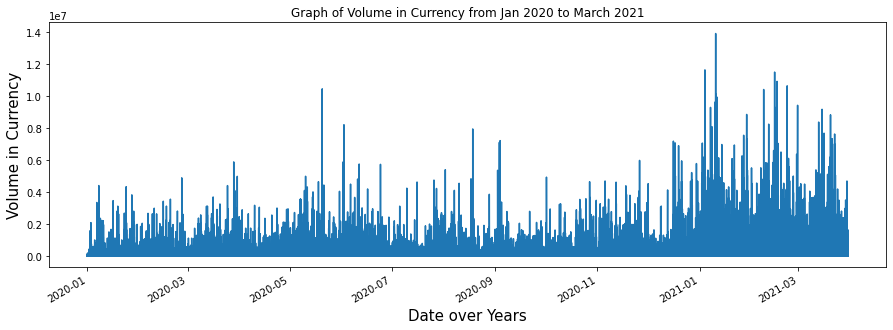

In [43]:
bitcoin_f["01-2020":"03-2021"]["Volume_(Currency)"].plot()

plt.title("Graph of Volume in Currency from Jan 2020 to March 2021")
plt.xlabel("Date over Years",fontsize=15)
plt.ylabel("Volume in Currency",fontsize=15)
plt.show()

### 8. Bitcoin Weighted_Price Value over years

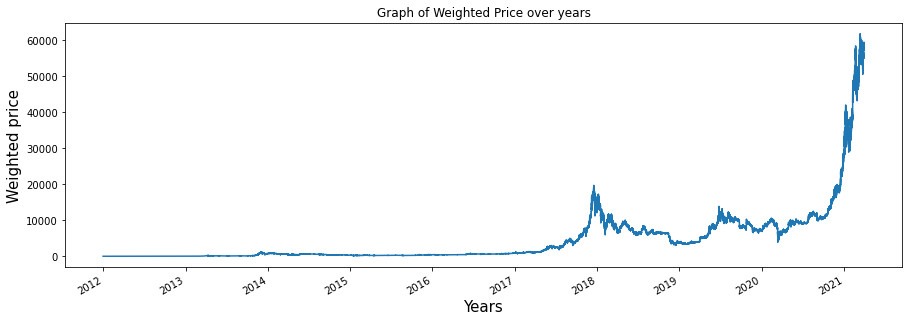

In [44]:
bitcoin_f["Weighted_Price"].plot()

plt.title("Graph of Weighted Price over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Weighted price",fontsize=15)
plt.show()

### 9. Resample- 3 Months

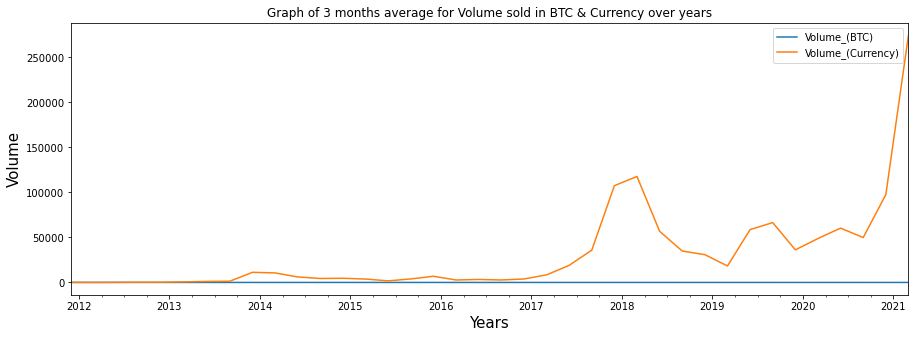

In [45]:
bitcoin_resample_y = bitcoin_f.resample('3M').mean()[["Volume_(BTC)","Volume_(Currency)"]]
bitcoin_resample_y.plot()

plt.title("Graph of 3 months average for Volume sold in BTC & Currency over years")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Volume",fontsize=15)
plt.show()

### 10. Moving Average over Years

In [46]:
bitcoin_value_nad = bitcoin_f.resample('M').count()["Close"]
print(bitcoin_value_nad)

Date_time
2011-12-31        5
2012-01-31      500
2012-02-29      581
2012-03-31      589
2012-04-30      766
              ...  
2020-11-30    43134
2020-12-31    44613
2021-01-31    44617
2021-02-28    40292
2021-03-31    42816
Freq: M, Name: Close, Length: 112, dtype: int64


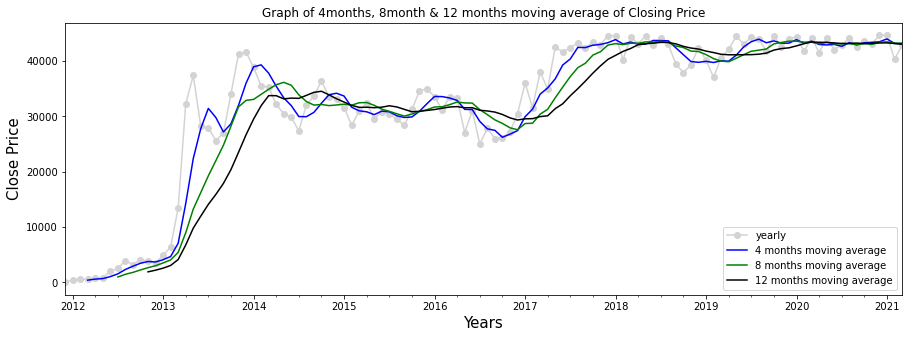

In [47]:
plt.figure(figsize=(15,5))

bitcoin_value_nad.plot(marker='o', color='lightgray',label='yearly')

bitcoin_value_nad.rolling(4).mean().plot(color='blue',label='4 months moving average')

bitcoin_value_nad.rolling(8).mean().plot(color='green',label='8 months moving average')

bitcoin_value_nad.rolling(12).mean().plot(color='black',label='12 months moving average')


plt.title("Graph of 4months, 8month & 12 months moving average of Closing Price")
plt.xlabel("Years",fontsize=15)
plt.ylabel("Close Price",fontsize=15)

plt.legend()

### Now a trend is observed in the above graph for 4months, 8months and 12 months moving average

# 3. Analysing of Data

### 1. Using Crosstab for Months and Years

In [48]:
ctb = pd.crosstab(index=bitcoin_f.index.month,
           columns=bitcoin_f.index.year,
           rownames=['Month'],
           colnames=['Year'])

ctb

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,
1,0,500,4878,38827,31585,33522,35978,44536,40159,44399,44617
2,0,581,6427,35484,28364,31174,31591,40236,37032,41723,40292
3,0,589,13464,35241,30938,33548,37997,44295,40547,44215,42816
4,0,766,32216,32152,32362,33240,34939,43124,42085,41514,0
5,0,873,37396,30461,29559,27052,42504,44529,44443,44114,0
6,0,2014,28181,29833,30865,31038,41627,42850,43071,42062,0
7,0,2564,27919,27384,30477,24993,42369,44183,44281,42860,0
8,0,3937,25595,32036,29462,27863,43276,42970,43927,44159,0
9,0,3244,27003,33610,28359,25970,42354,39447,41840,42587,0


In [49]:
import calendar

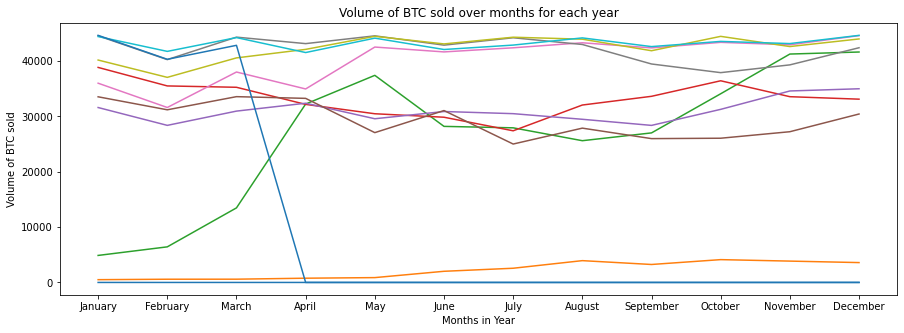

In [50]:
plt.figure(figsize=(15,5))
plt.plot(ctb)

plt.xticks(np.arange(1,13), calendar.month_name[1:13])

plt.title("Volume of BTC sold over months for each year")
plt.xlabel("Months in Year")
plt.ylabel("Volume of BTC sold")

plt.show()

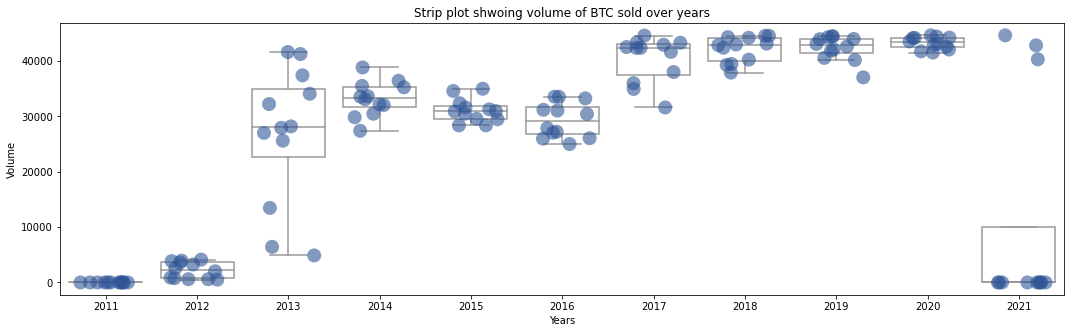

In [51]:
plt.figure(figsize=(18,5))

sns.stripplot(data=ctb, jitter =.3, size=14,alpha=0.6,color='#2F5597')
sns.boxplot(data=ctb,color='w',showfliers = False)

plt.title("Strip plot shwoing volume of BTC sold over years")
plt.xlabel("Years")
plt.ylabel("Volume")

plt.show()

### 2. Correlation 

In [52]:
bitcoin_corr = bitcoin_f.corr()
bitcoin_corr

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737
Open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


<AxesSubplot:>

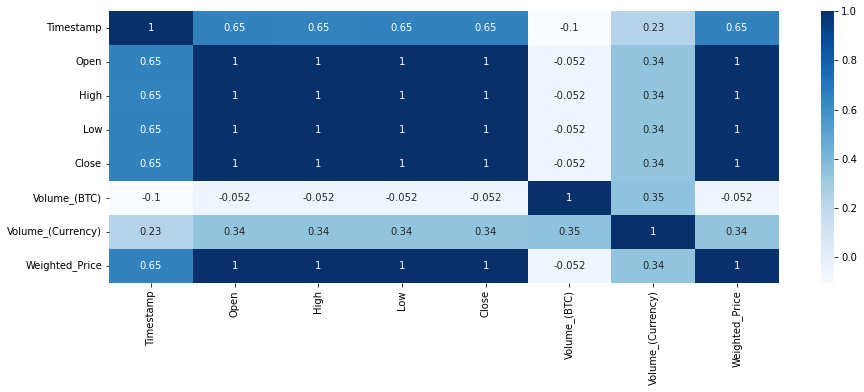

In [53]:
sns.heatmap(bitcoin_corr,annot=True,cmap="Blues")

# 4.Buidling Models and Model Evaluation

### 1. Simple Linear Regression Model 

#### OLS Method from statsmodels

In [54]:
import statsmodels.formula.api as smf

In [55]:
bitcoin_f

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Date
Date_time,,,,,,,,,,
2011-12-31 02:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011
2011-12-31 10:50:00,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,12-31-2011 10:50:00,12-31-2011
2011-12-31 11:59:00,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,12-31-2011 11:59:00,12-31-2011
2011-12-31 12:00:00,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,12-31-2011 12:00:00,12-31-2011
2011-12-31 23:16:00,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,12-31-2011 23:16:00,12-31-2011
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 19:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,03-30-2021 19:56:00,03-30-2021
2021-03-30 19:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,03-30-2021 19:57:00,03-30-2021
2021-03-30 19:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,03-30-2021 19:58:00,03-30-2021


In [56]:
reg_model = smf.ols(formula='Close ~ Open', data=bitcoin_f).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.237e+12
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:44:24   Log-Likelihood:            -1.5003e+07
No. Observations:             3613769   AIC:                         3.001e+07
Df Residuals:                 3613767   BIC:                         3.001e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0764      0.010     -7.854      0.0

In [57]:
b0_ = reg_model.params[0]
b1_ = reg_model.params[1]
print("b0_:",b0_)
print("b1_:",b1_)

b0_: -0.07639421999897422
b1_: 1.0000110265995548


#### Close = -0.076 + 1 * Open 

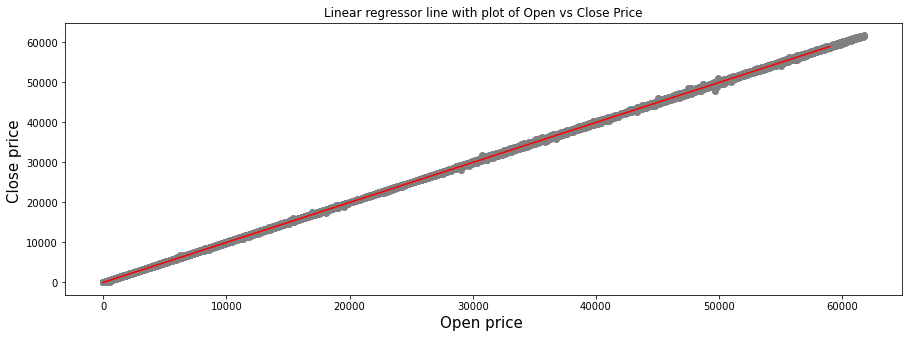

In [58]:
x=np.arange(0,59000)

plt.plot(x,b0_+b1_*x,color='red')

plt.scatter(x='Open',y='Close',data=bitcoin_f,color='gray')

plt.title("Linear regressor line with plot of Open vs Close Price")
plt.xlabel("Open price ",fontsize=15)
plt.ylabel("Close price ",fontsize=15)

plt.show()

In [59]:
r_squared = reg_model.rsquared
print("R-Squared:",r_squared)

R-Squared: 0.999997079002211


#### Making Predictions of Close Price when Open price is gt 60k

In [60]:
# Predicting Close Price of Sales when Open Price is 60000 
open_data = np.arange(60000,100000)
data ={'Open':open_data}

reg_model.predict(data)
reg_model.get_prediction(data).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,60000.585202,0.049211,60000.488751,60000.681653,59970.449386,60030.721017
1,60001.585213,0.049212,60001.488760,60001.681666,59971.449397,60031.721028
2,60002.585224,0.049212,60002.488769,60002.681678,59972.449408,60032.721039
3,60003.585235,0.049213,60003.488779,60003.681691,59973.449419,60033.721050
4,60004.585246,0.049214,60004.488788,60004.681704,59974.449431,60034.721061
...,...,...,...,...,...,...
39995,99996.026211,0.084886,99995.859838,99996.192584,99965.890090,100026.162331
39996,99997.026222,0.084887,99996.859847,99997.192596,99966.890101,100027.162342
39997,99998.026233,0.084887,99997.859856,99998.192609,99967.890112,100028.162353
39998,99999.026244,0.084888,99998.859865,99999.192622,99968.890123,100029.162364


### 2. Multiple Linear Regression Model 

#### test_train_split from sklearn

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score,mean_absolute_error as mae, mean_squared_error as mse

In [62]:
X_predictor = bitcoin_f[["Open","High","Low","Volume_(BTC)","Volume_(Currency)","Weighted_Price"]]
y_target = bitcoin_f["Close"]

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_predictor,y_target,random_state=66,test_size=0.8)

In [64]:
regression = LinearRegression()

In [65]:
regression.fit(X_train,y_train)

LinearRegression()

In [66]:
#Accuracy score of Model
regression.score(X_test,y_test)

0.9999993543190816

In [67]:
y_predicted = regression.predict(X_test)
y_pred = pd.DataFrame(y_predicted)
y_test_df = pd.DataFrame(y_test)

In [68]:
Evaluation_df = np.column_stack([y_test_df,y_pred])

In [69]:
Evaluation_df

array([[  240.15      ,   240.31293573],
       [ 4280.        ,  4279.90474998],
       [ 8025.38      ,  8029.98553015],
       ...,
       [   98.63      ,    98.66375889],
       [57459.46      , 57442.15558745],
       [  381.31      ,   381.22756254]])

In [70]:
print("Mean Absolute Error:",mae(y_test_df,y_pred))

Mean Absolute Error: 2.64201056039184


In [71]:
MSE = mse(y_test_df,y_pred)
print("Mean Square Error:",MSE)

Mean Square Error: 52.24326880305876


In [72]:
RMSE = np.sqrt(MSE)
print("Root Mean Square Error",RMSE)

Root Mean Square Error 7.22795052577553


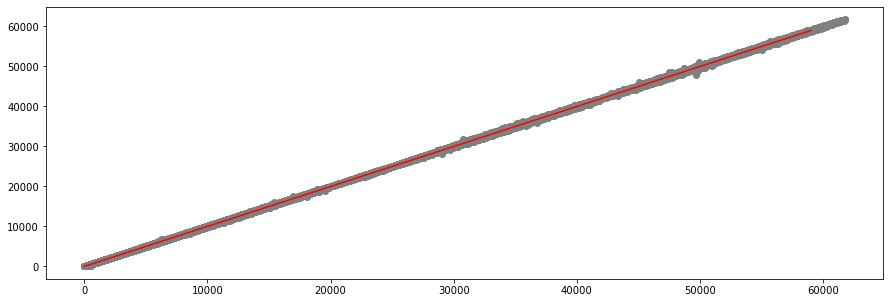

In [73]:
x=np.arange(0,59000)

plt.plot(x,b0_+b1_*x,color='red')

plt.scatter(x='Open',y='Close',data=bitcoin_f,color='gray')


plt.show()

#### The RMSE here is high which indicates that model is failing to acount the important features, so lets take a look at which predictors doesnt make any affect on target class from OLS table

#### OLS Model for Multiple Linear Regression 

In [74]:
bitcoin_reg = bitcoin_f
bitcoin_reg.rename(columns= {'Volume_(BTC)':'Volume_BTC','Volume_(Currency)':'Volume_Currency'}, inplace=True)
bitcoin_reg

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,Datetime,Date
Date_time,,,,,,,,,,
2011-12-31 02:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,12-31-2011 02:52:00,12-31-2011
2011-12-31 10:50:00,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,12-31-2011 10:50:00,12-31-2011
2011-12-31 11:59:00,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,12-31-2011 11:59:00,12-31-2011
2011-12-31 12:00:00,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,12-31-2011 12:00:00,12-31-2011
2011-12-31 23:16:00,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,12-31-2011 23:16:00,12-31-2011
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 19:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,03-30-2021 19:56:00,03-30-2021
2021-03-30 19:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,03-30-2021 19:57:00,03-30-2021
2021-03-30 19:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,03-30-2021 19:58:00,03-30-2021


In [75]:
mul_model_f = 'Close ~ Open + High + Low + Volume_BTC + Volume_Currency + Weighted_Price'

mul_reg_model = smf.ols(formula=mul_model_f, data=bitcoin_reg).fit()
print(mul_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.422e+11
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:44:31   Log-Likelihood:            -1.2258e+07
No. Observations:             3613769   AIC:                         2.452e+07
Df Residuals:                 3613762   BIC:                         2.452e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0043      0.005     

In [76]:
mul_reg_model.rsquared

0.9999993607266408

#### From the above OLS table it is interpreted that all the above predictors  have significant impact on target class as th P<|t| values is less that 0.05

#### Making Predictions

In [77]:
# Predicting Close Price of Sales when Open Price is 60000 
data_input = np.arange(0,50)

data ={'Open':[60000.49,80000.56],"High":[50000.57,40000],"Low":[80000,10000],"Volume_BTC":[40.879,2.789],
       "Volume_Currency":[30000.65,87000.98],"Weighted_Price":[10.39,79860.324]}

reg_model.predict(data)
reg_model.get_prediction(data).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,60001.075207,0.049211,60000.978755,60001.171659,59970.939392,60031.211022
1,80001.365740,0.067013,80001.234397,80001.497083,79971.229793,80031.501687


### 3. STL Decomposition

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
bitcoin_resample_stl = bitcoin_f.resample('M').mean()
bitcoin_resample_stl

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Date_time,,,,,,,,
2011-12-31,1.325351e+09,4.488000,4.502000,4.488000,4.502000,19.363976,86.439900,4.493282
2012-01-31,1.326822e+09,6.348920,6.352520,6.344740,6.349680,4.036837,25.204816,6.349487
2012-02-29,1.329322e+09,5.228675,5.230103,5.225525,5.226988,8.298542,42.157842,5.226922
2012-03-31,1.331923e+09,4.985331,4.986553,4.982411,4.983667,15.259781,76.822960,4.984240
2012-04-30,1.334616e+09,4.994413,4.995679,4.993016,4.994321,21.663379,108.100953,4.994333
...,...,...,...,...,...,...,...,...
2020-11-30,1.605503e+09,16570.886848,16580.821825,16560.622860,16571.131946,6.706015,111315.014302,16571.091835
2020-12-31,1.608138e+09,21877.005362,21891.413869,21862.115250,21877.421298,5.756086,129929.321570,21877.043688
2021-01-31,1.610816e+09,34581.143204,34621.281857,34539.449570,34581.268863,10.242387,352328.291267,34579.362154


### Additive Model

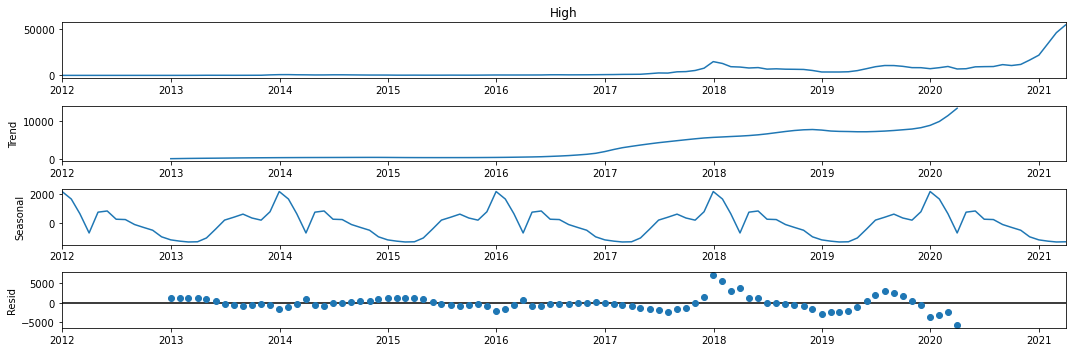

In [80]:
res_high_add = seasonal_decompose(bitcoin_resample_stl["High"],model='additive',period=24)
resplot_high_add = res_high_add.plot()

### Multiplicative Model

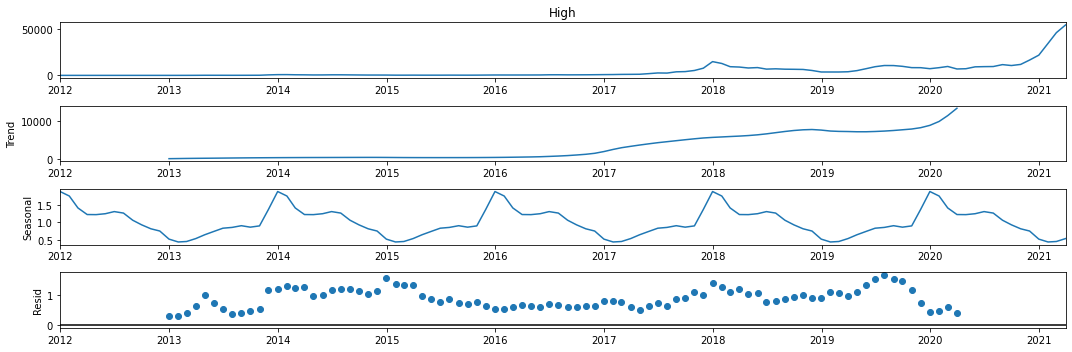

In [81]:
res_high_mul = seasonal_decompose(bitcoin_resample_stl["High"],model='multiplicative',period=24)
resplot_high_mul = res_high_mul.plot()

## Check if the time-series is stationary or not?

### Augmented Dickey Fuller test (ADH Test)

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
result_adf = adfuller(bitcoin_resample_stl['High'], autolag='AIC')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
for key, value in result_adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 2.121171166590079
p-value: 0.9988111183353205
Critial Values:
   1%, -3.4912451337340342
Critial Values:
   5%, -2.8881954545454547
Critial Values:
   10%, -2.5809876033057852


## Detrend a timeseries using Baxter-king filter

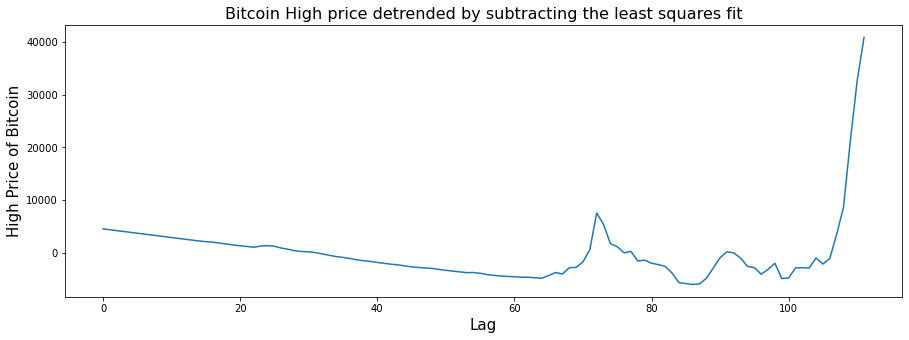

In [84]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(bitcoin_resample_stl['High'])
plt.plot(detrended)
plt.title('Bitcoin High price detrended by subtracting the least squares fit', fontsize=16)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("High Price of Bitcoin",fontsize=15)
plt.show()

## Deseasonalize the timeseries

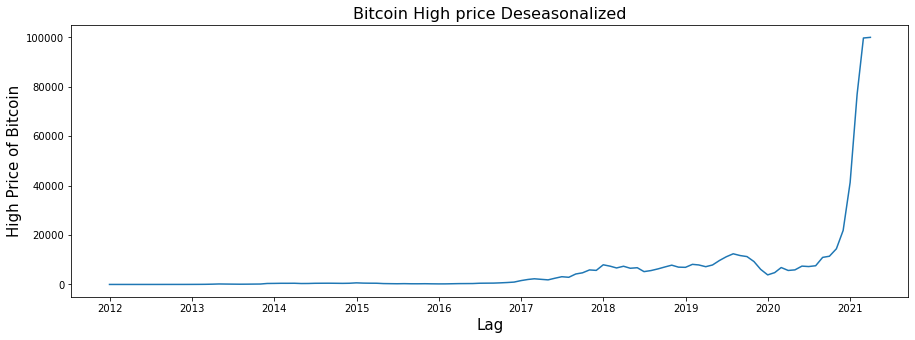

In [85]:
# Deseasonalize
deseasonalized = bitcoin_resample_stl['High'] / res_high_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Bitcoin High price Deseasonalized', fontsize=16)
plt.xlabel("Lag",fontsize=15)
plt.ylabel("High Price of Bitcoin",fontsize=15)
plt.show()

## Autocorrelation plot of High Price

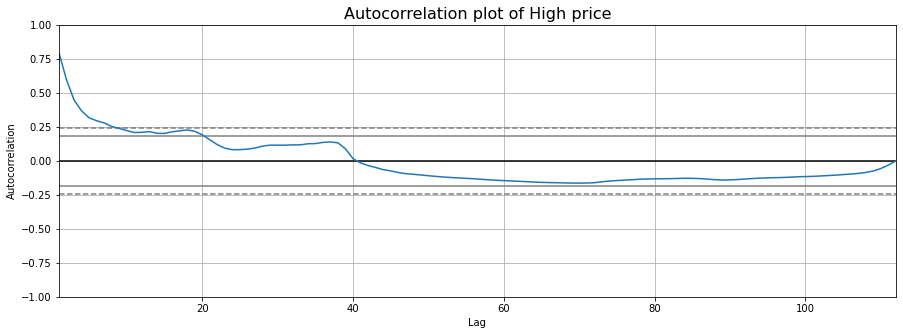

In [86]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(bitcoin_resample_stl['High'].tolist())

plt.title("Autocorrelation plot of High price",fontsize=16)
plt.show()

### The time series data has just been analyzed by visualizing with plots and forecast of values has not been done